**Run the two cells below before you begin. These will set the notebook to autosave every 10 seconds, import the necessary libraries for this challenge, and set figure appearance.**

In [103]:
%autosave 10

Autosaving every 10 seconds


In [104]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_columns', 500)


plt.rcParams['figure.dpi'] = 400
plt.rcParams['font.size'] = 4

**To begin, import data set `cleaned_data.csv` and create lists of feature names for the remaining financial features: `'BILL_AMT1'`, `'BILL_AMT2'`, `'BILL_AMT3'`, `'BILL_AMT4'`, `'BILL_AMT5'`, `'BILL_AMT6'`,  `'PAY_AMT1'`, `'PAY_AMT2'`, `'PAY_AMT3'`, `'PAY_AMT4'`, `'PAY_AMT5'`, and `'PAY_AMT6'`.**

**Name the features `bill_feats` and `pay_amt_feats`, respectively.**

In [105]:
# Import the dataset
df = pd.read_csv("cleaned_data.csv")
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,EDUCATION_CAT,graduate school,high school,others,university
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1,university,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,university,0,0,0,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,university,0,0,0,1
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0,university,0,0,0,1
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,university,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26659,ecff42d0-bdc6,220000,1,3,1,39,0,0,0,0,0,0,188948,192815,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000,0,high school,0,1,0,0
26660,99d1fa0e-222b,150000,1,3,2,43,-1,-1,-1,-1,0,0,1683,1828,3502,8979,5190,0,1837,3526,8998,129,0,0,0,high school,0,1,0,0
26661,95cdd3e7-4f24,30000,1,2,2,37,4,3,2,-1,0,0,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100,1,university,0,0,0,1
26662,00d03f02-04cd,80000,1,3,1,41,1,-1,0,0,0,-1,-1645,78379,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804,1,high school,0,1,0,0


In [106]:
# Create lists `bill_feats` and `pay_amt_feats`

bill_feats = df[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']]
print(bill_feats)
pay_amt_feats = df[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']]
pay_amt_feats

       BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  BILL_AMT6
0           3913       3102        689          0          0          0
1           2682       1725       2682       3272       3455       3261
2          29239      14027      13559      14331      14948      15549
3          46990      48233      49291      28314      28959      29547
4           8617       5670      35835      20940      19146      19131
...          ...        ...        ...        ...        ...        ...
26659     188948     192815     208365      88004      31237      15980
26660       1683       1828       3502       8979       5190          0
26661       3565       3356       2758      20878      20582      19357
26662      -1645      78379      76304      52774      11855      48944
26663      47929      48905      49764      36535      32428      15313

[26664 rows x 6 columns]


,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,0,689,0,0,0,0
1,0,1000,1000,1000,0,2000
2,1518,1500,1000,1000,1000,5000
3,2000,2019,1200,1100,1069,1000
4,2000,36681,10000,9000,689,679
...,...,...,...,...,...,...
26659,8500,20000,5003,3047,5000,1000
26660,1837,3526,8998,129,0,0
26661,0,0,22000,4200,2000,3100
26662,85900,3409,1178,1926,52964,1804


____________________________________________________________________________________
**Next, use `.describe()` to examine statistical summaries of the bill amount features**


In [107]:
bill_feats.describe()


,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
count,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000
mean,51405.730723,49300.001500,47026.340047,43338.894539,40338.136701,38889.872337
std,73633.687106,70934.549534,68705.359524,64275.250740,60705.944083,59432.541657
min,-165580.000000,-69777.000000,-157264.000000,-170000.000000,-81334.000000,-339603.000000
25%,3580.000000,2999.750000,2627.250000,2341.750000,1745.000000,1256.000000
50%,22361.000000,21150.000000,20079.500000,19037.000000,18066.000000,17005.000000
75%,67649.750000,64395.500000,60360.000000,54727.500000,50290.500000,49253.750000
max,746814.000000,671563.000000,855086.000000,706864.000000,823540.000000,699944.000000


Reflect on what you see. Does it make sense?

___________________________________________________________________________________
**Then you should visualize the bill amount features using a 2 by 3 grid of histogram plots.**
> Hint: You can use 20 bins for this visualization.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000019935B55C08>,
      dtype=object)

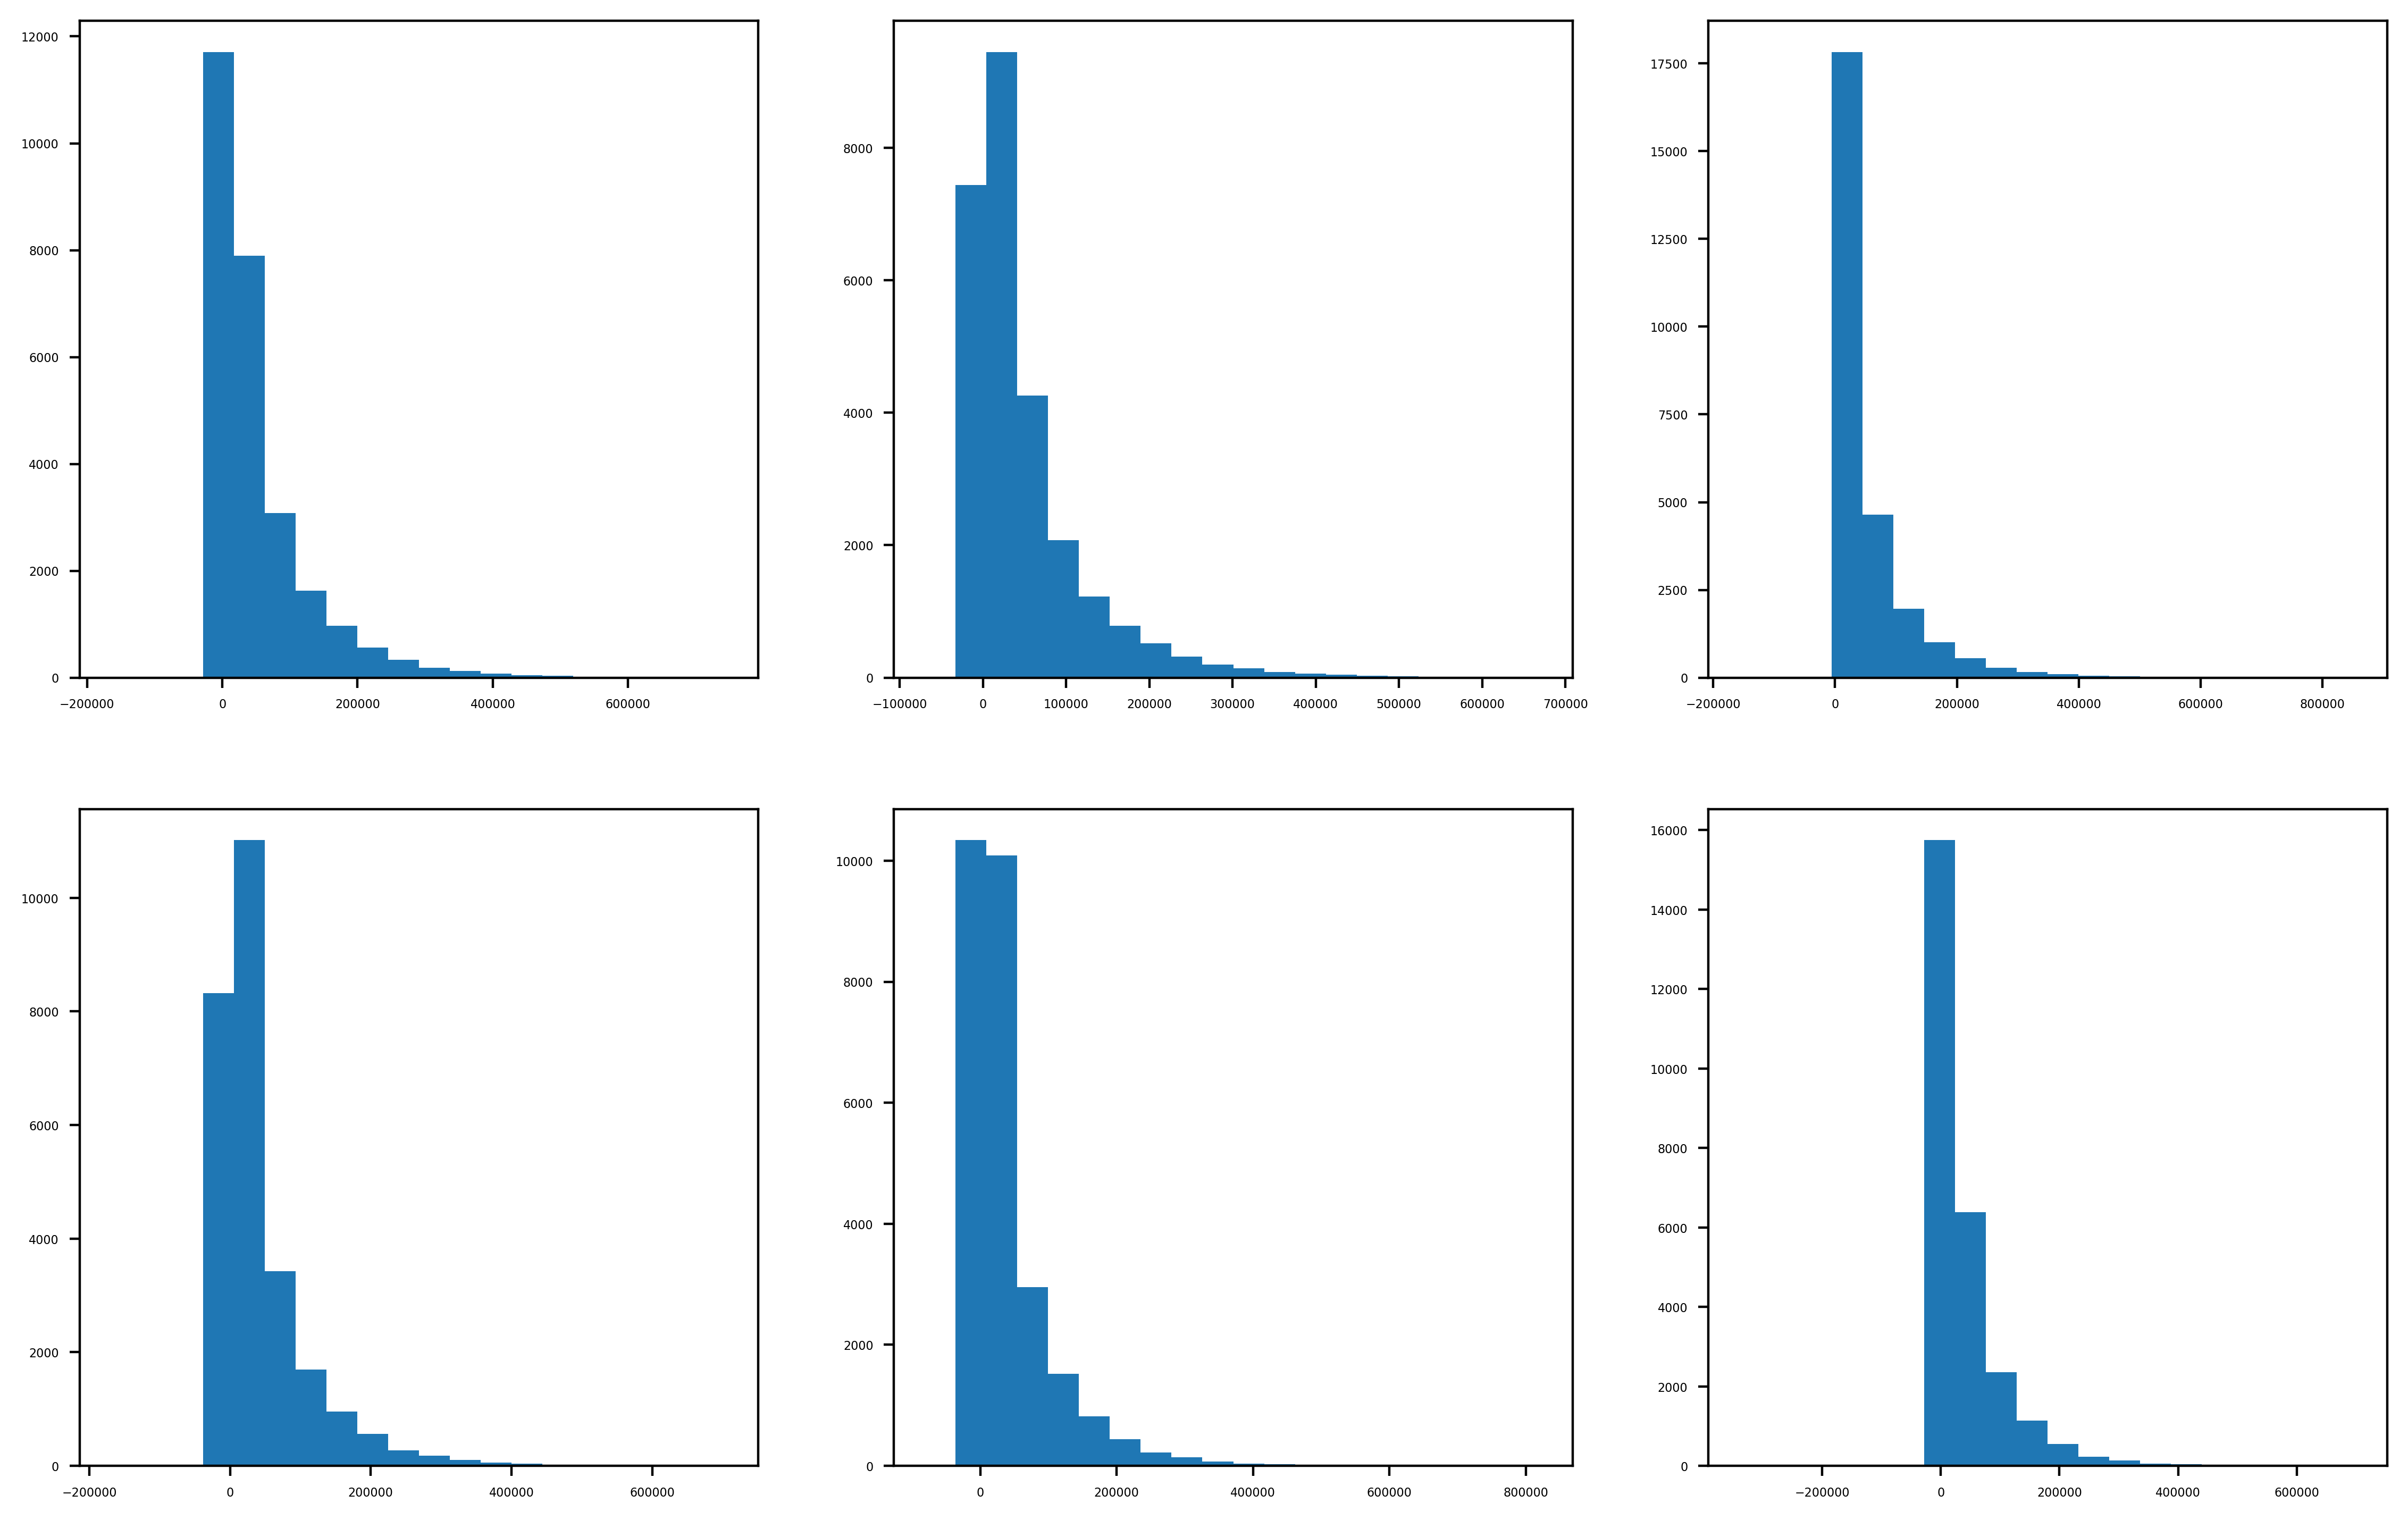

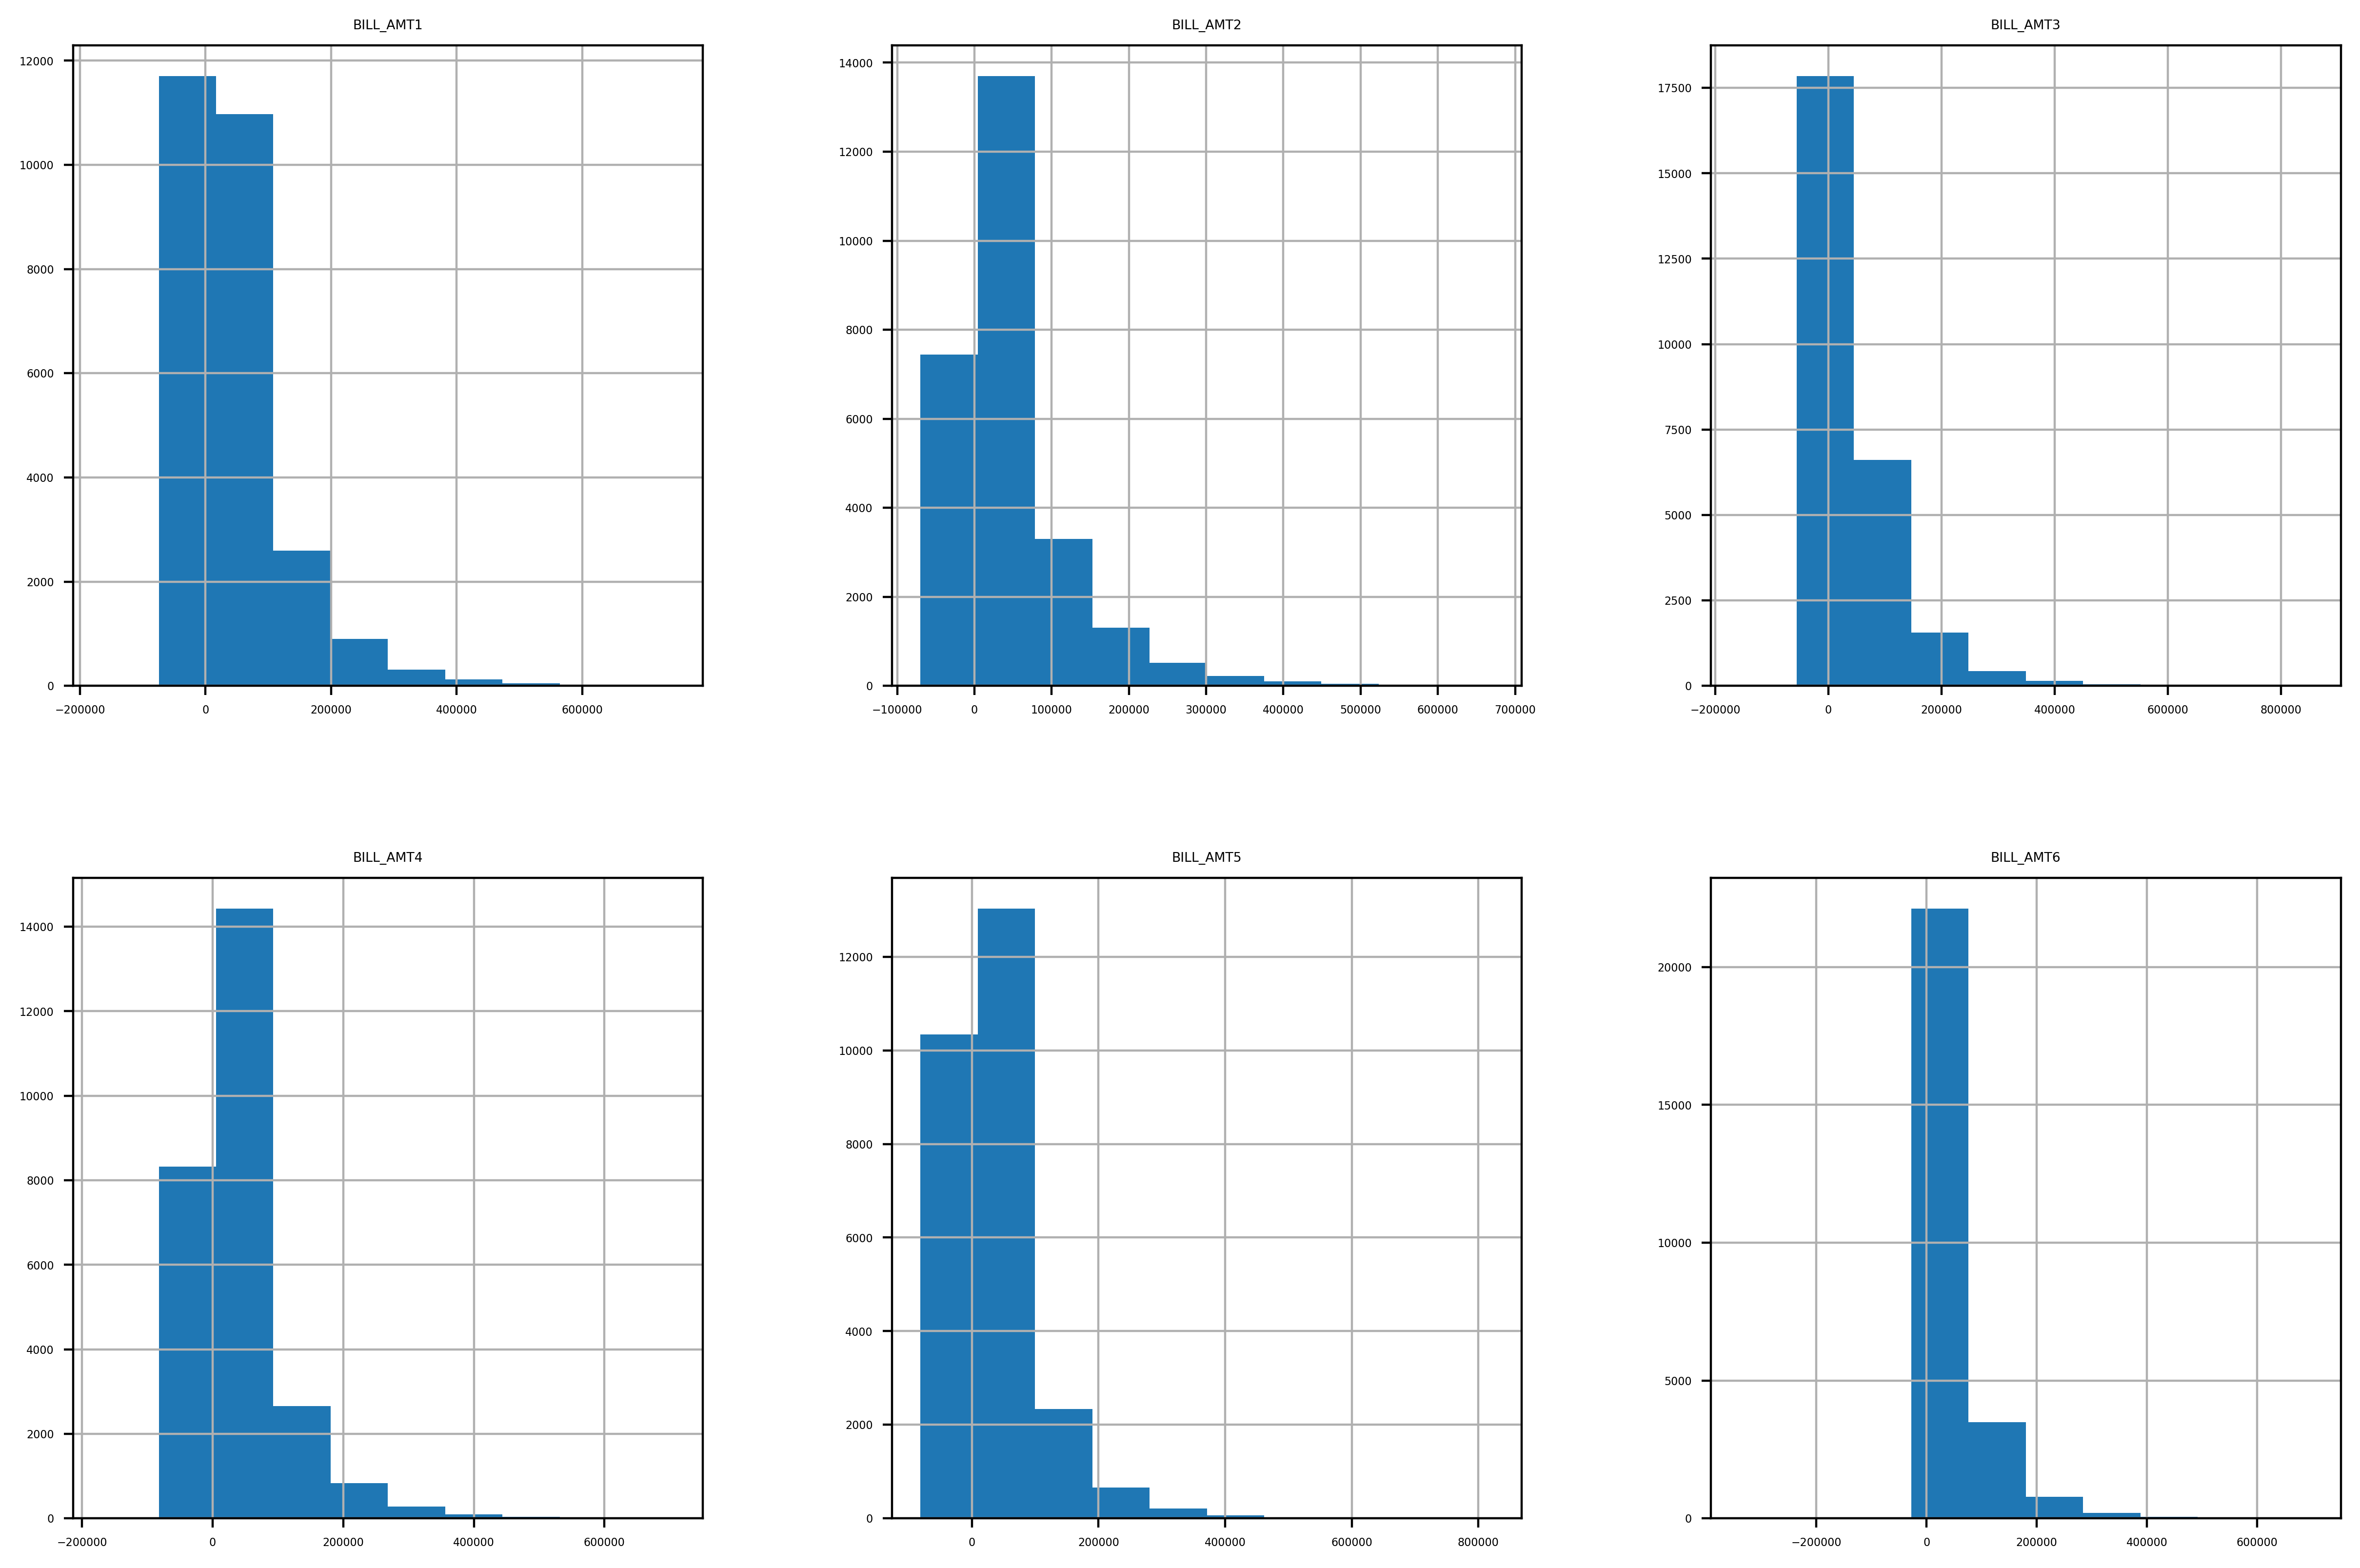

In [108]:
fig, axs = plt.subplots(2,3, figsize=(14,9))
# , sharey=True, tight_layout=True
axs[0,0].hist(bill_feats['BILL_AMT1'] , bins = 20)
axs[0,1].hist(bill_feats['BILL_AMT2'] , bins = 20)
axs[0,2].hist(bill_feats['BILL_AMT3'] , bins = 20)
axs[1,0].hist(bill_feats['BILL_AMT4'] , bins = 20)
axs[1,1].hist(bill_feats['BILL_AMT5'] , bins = 20)
axs[1,2].hist(bill_feats['BILL_AMT6'] , bins = 20)

bill_feats.hist(layout=(2,3),figsize = (15,10))
# for column in bill_feats:
#     plt.hist(column,bins=20)
#     plt.show()

________________________________________________________________________
**Next, obtain the `.describe()` summary of the payment amount features.**


In [109]:
pay_amt_feats.describe()

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,26664.000000,2.666400e+04,26664.000000,26664.000000,26664.000000,26664.000000
mean,5704.085771,5.881110e+03,5259.514964,4887.048717,4843.729973,5257.843047
std,16699.398632,2.121431e+04,17265.439561,15956.349371,15311.721795,17635.468185
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,1000.000000,8.020000e+02,390.000000,294.750000,242.750000,111.000000
50%,2114.500000,2.007000e+03,1822.000000,1500.000000,1500.000000,1500.000000
75%,5027.000000,5.000000e+03,4556.250000,4050.500000,4082.750000,4015.000000
max,873552.000000,1.227082e+06,889043.000000,621000.000000,426529.000000,528666.000000


    Does this make sense?

_______________________________________________________________________________________
**Next, plot a histogram of the bill payment features similar to the bill amount features, 
but also apply some rotation to the x-axis labels with the `xrot` keyword argument 
so that they don't overlap. In any plotting function, you can include the `xrot=<angle>`
keyword argument to rotate x-axis labels by a given angle in degrees.**


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000199372AE148>,
      dtype=object)

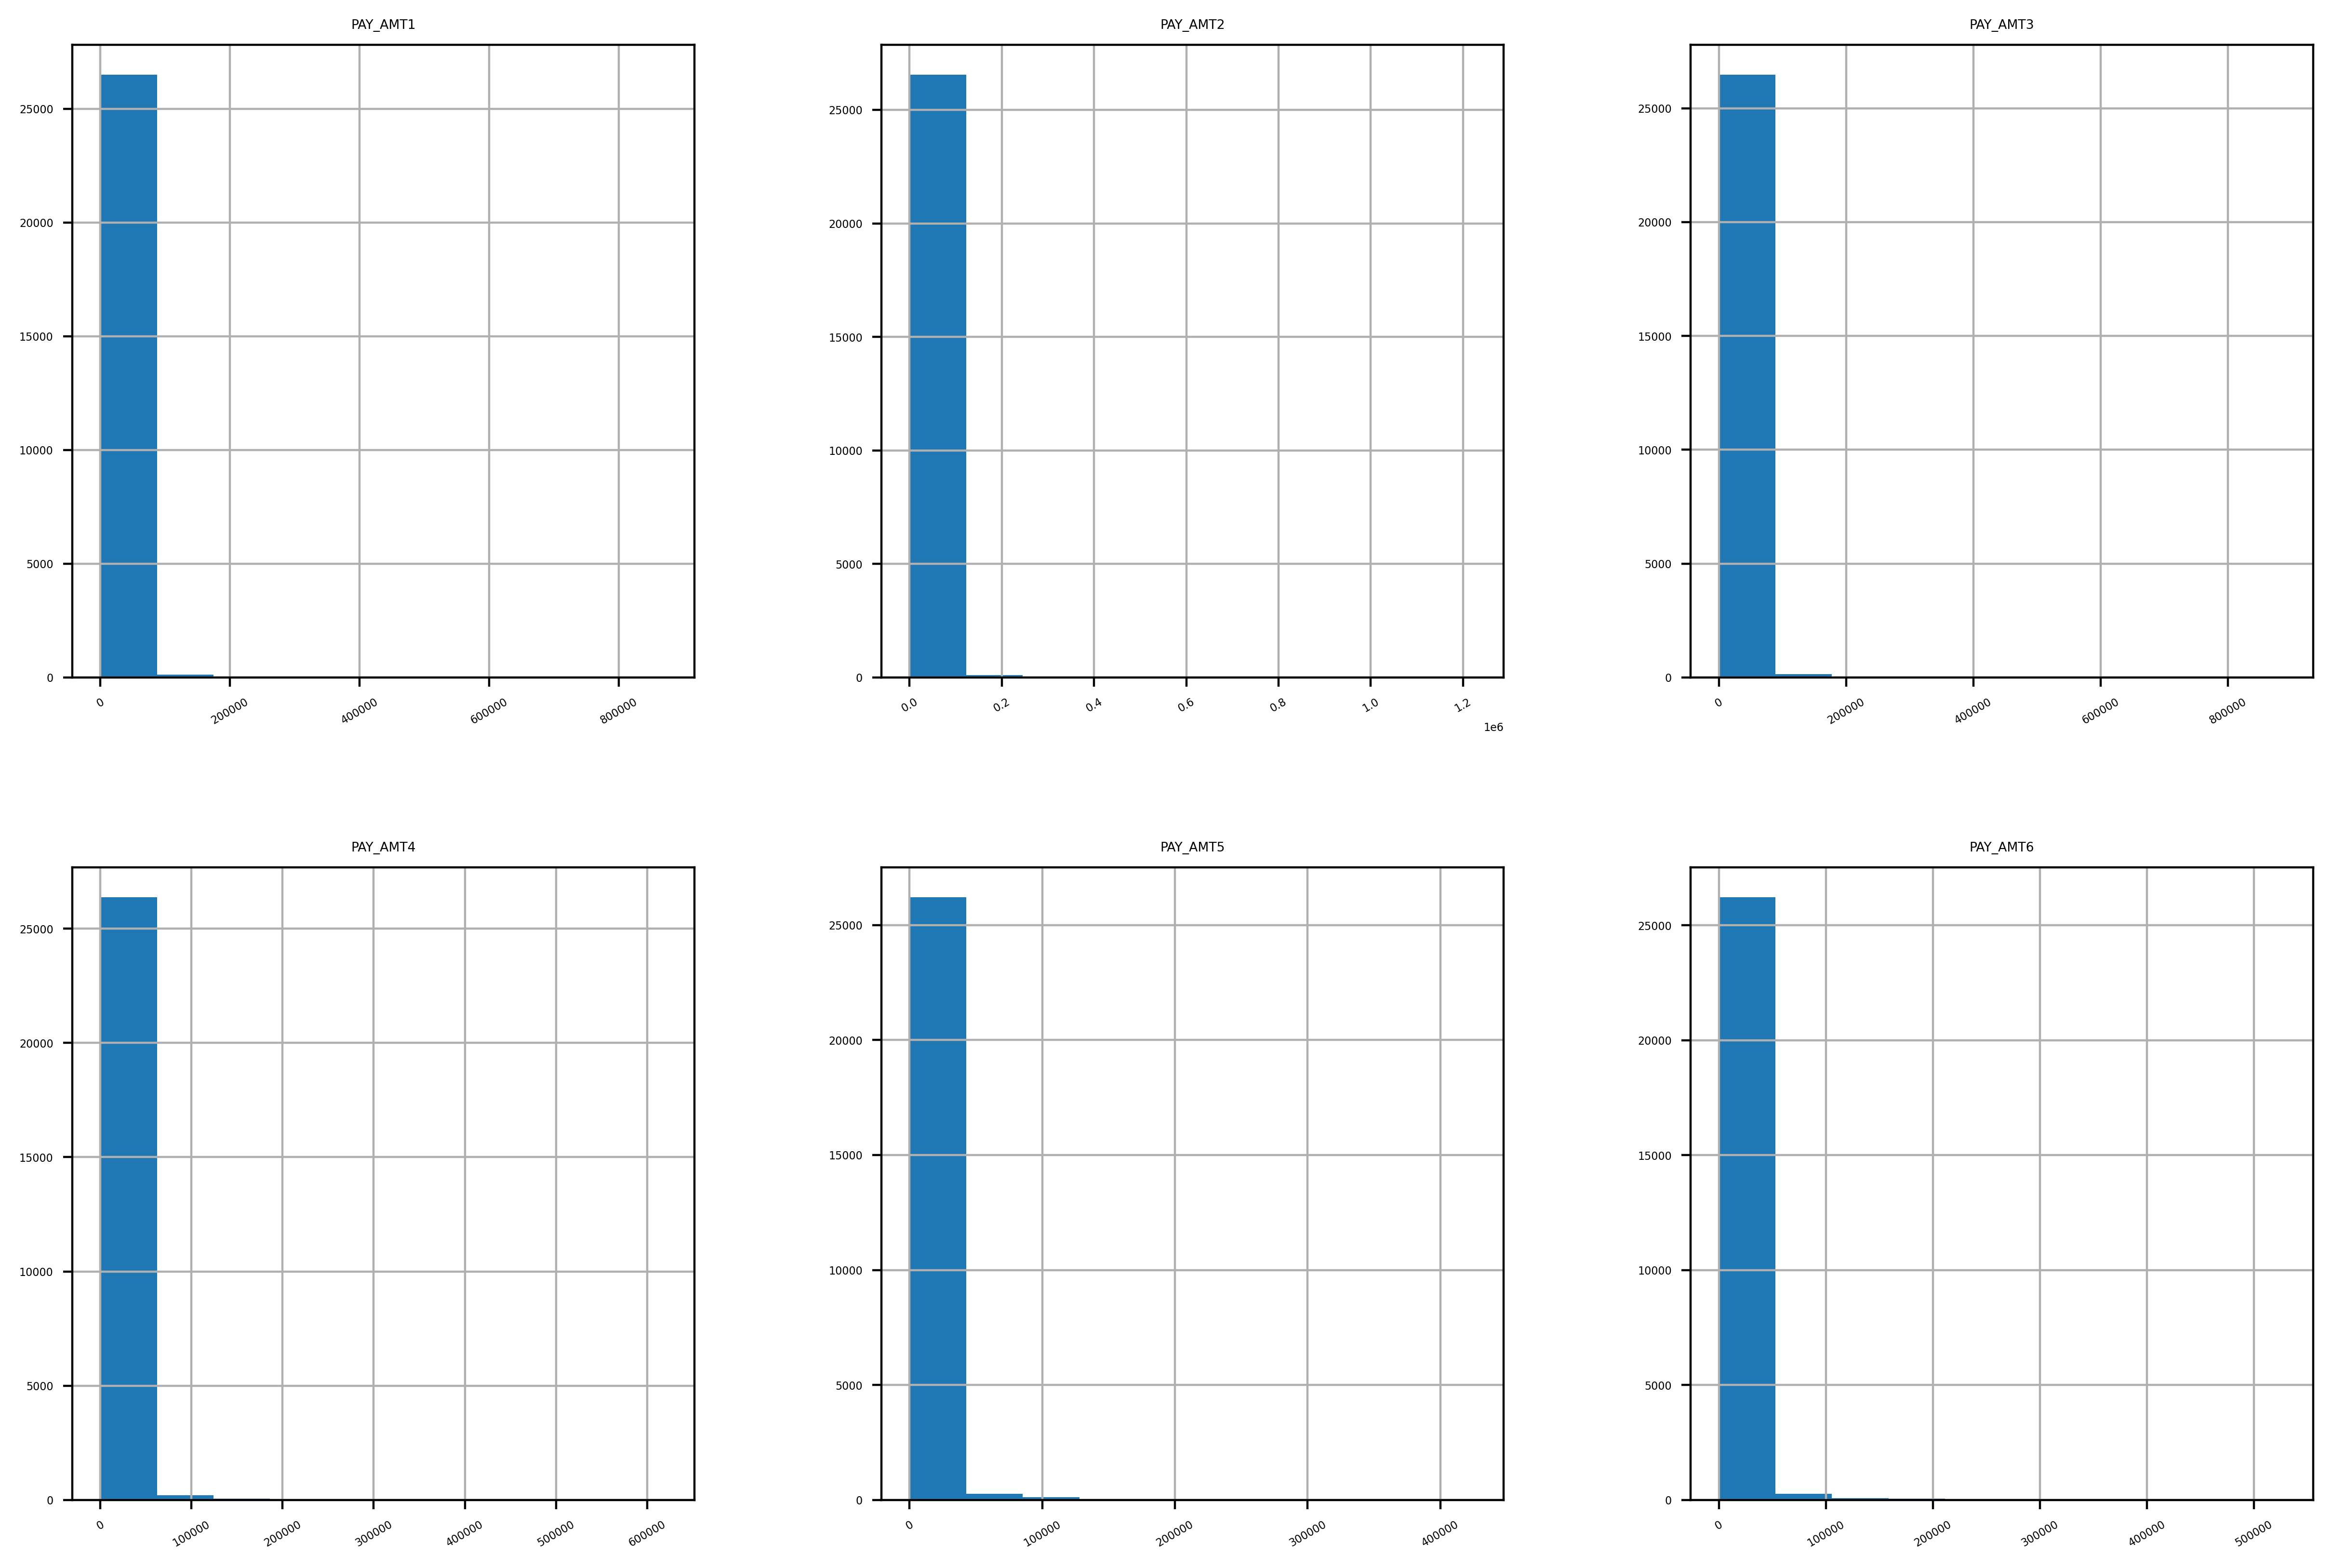

In [110]:
# fig, axs = plt.subplots(2,3, figsize=(14,9) )#, sharey=True, tight_layout=True)
# axs[0,0].hist(pay_amt_feats['PAY_AMT1'] , bins = 15)
# axs[0,1].hist(pay_amt_feats['PAY_AMT2'] , bins = 20)
# axs[0,2].hist(pay_amt_feats['PAY_AMT3'] , bins = 20)
# axs[1,0].hist(pay_amt_feats['PAY_AMT4'] , bins = 20)
# axs[1,1].hist(pay_amt_feats['PAY_AMT5'] , bins = 20)
# axs[1,2].hist(pay_amt_feats['PAY_AMT6'] , bins = 20)

pay_amt_feats.hist(layout=(2,3), xrot=30,figsize=(15,10))

    Consider these results.

______________________________________________________________________________________________
**Then, use a Boolean mask to see how many of the payment amount data are exactly equal to 0. Review the results of the generated mask using `.head()` and `.sum()`.**



In [111]:
# Create Boolean mask
pay_z_mask = pay_amt_feats == 0


In [112]:
# Use `.head()`
pay_z_mask.head()

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,True,False,True,True,True,True
1,True,False,False,False,True,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False


In [113]:
# Use `.sum()`
pay_z_mask.sum()

PAY_AMT1    4656
PAY_AMT2    4833
PAY_AMT3    5293
PAY_AMT4    5697
PAY_AMT5    5981
PAY_AMT6    6373
dtype: int64

     Does this make sense given the histogram in the previous step?

_______________________________________________________________________________________________________________________________
**Finally, ignoring the payments of 0 using the mask you created in the previous step, use pandas `.apply()` and NumPy's `np.log10()` to plot histograms of logarithmic transformations of the non-zero payments.**
> Hint: You can use `.apply()` to apply any function, including `log10`, to all the elements of a DataFrame or a column using the following syntax: `.apply(<function_name>)`.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000199375AA6C8>,
      dtype=object)

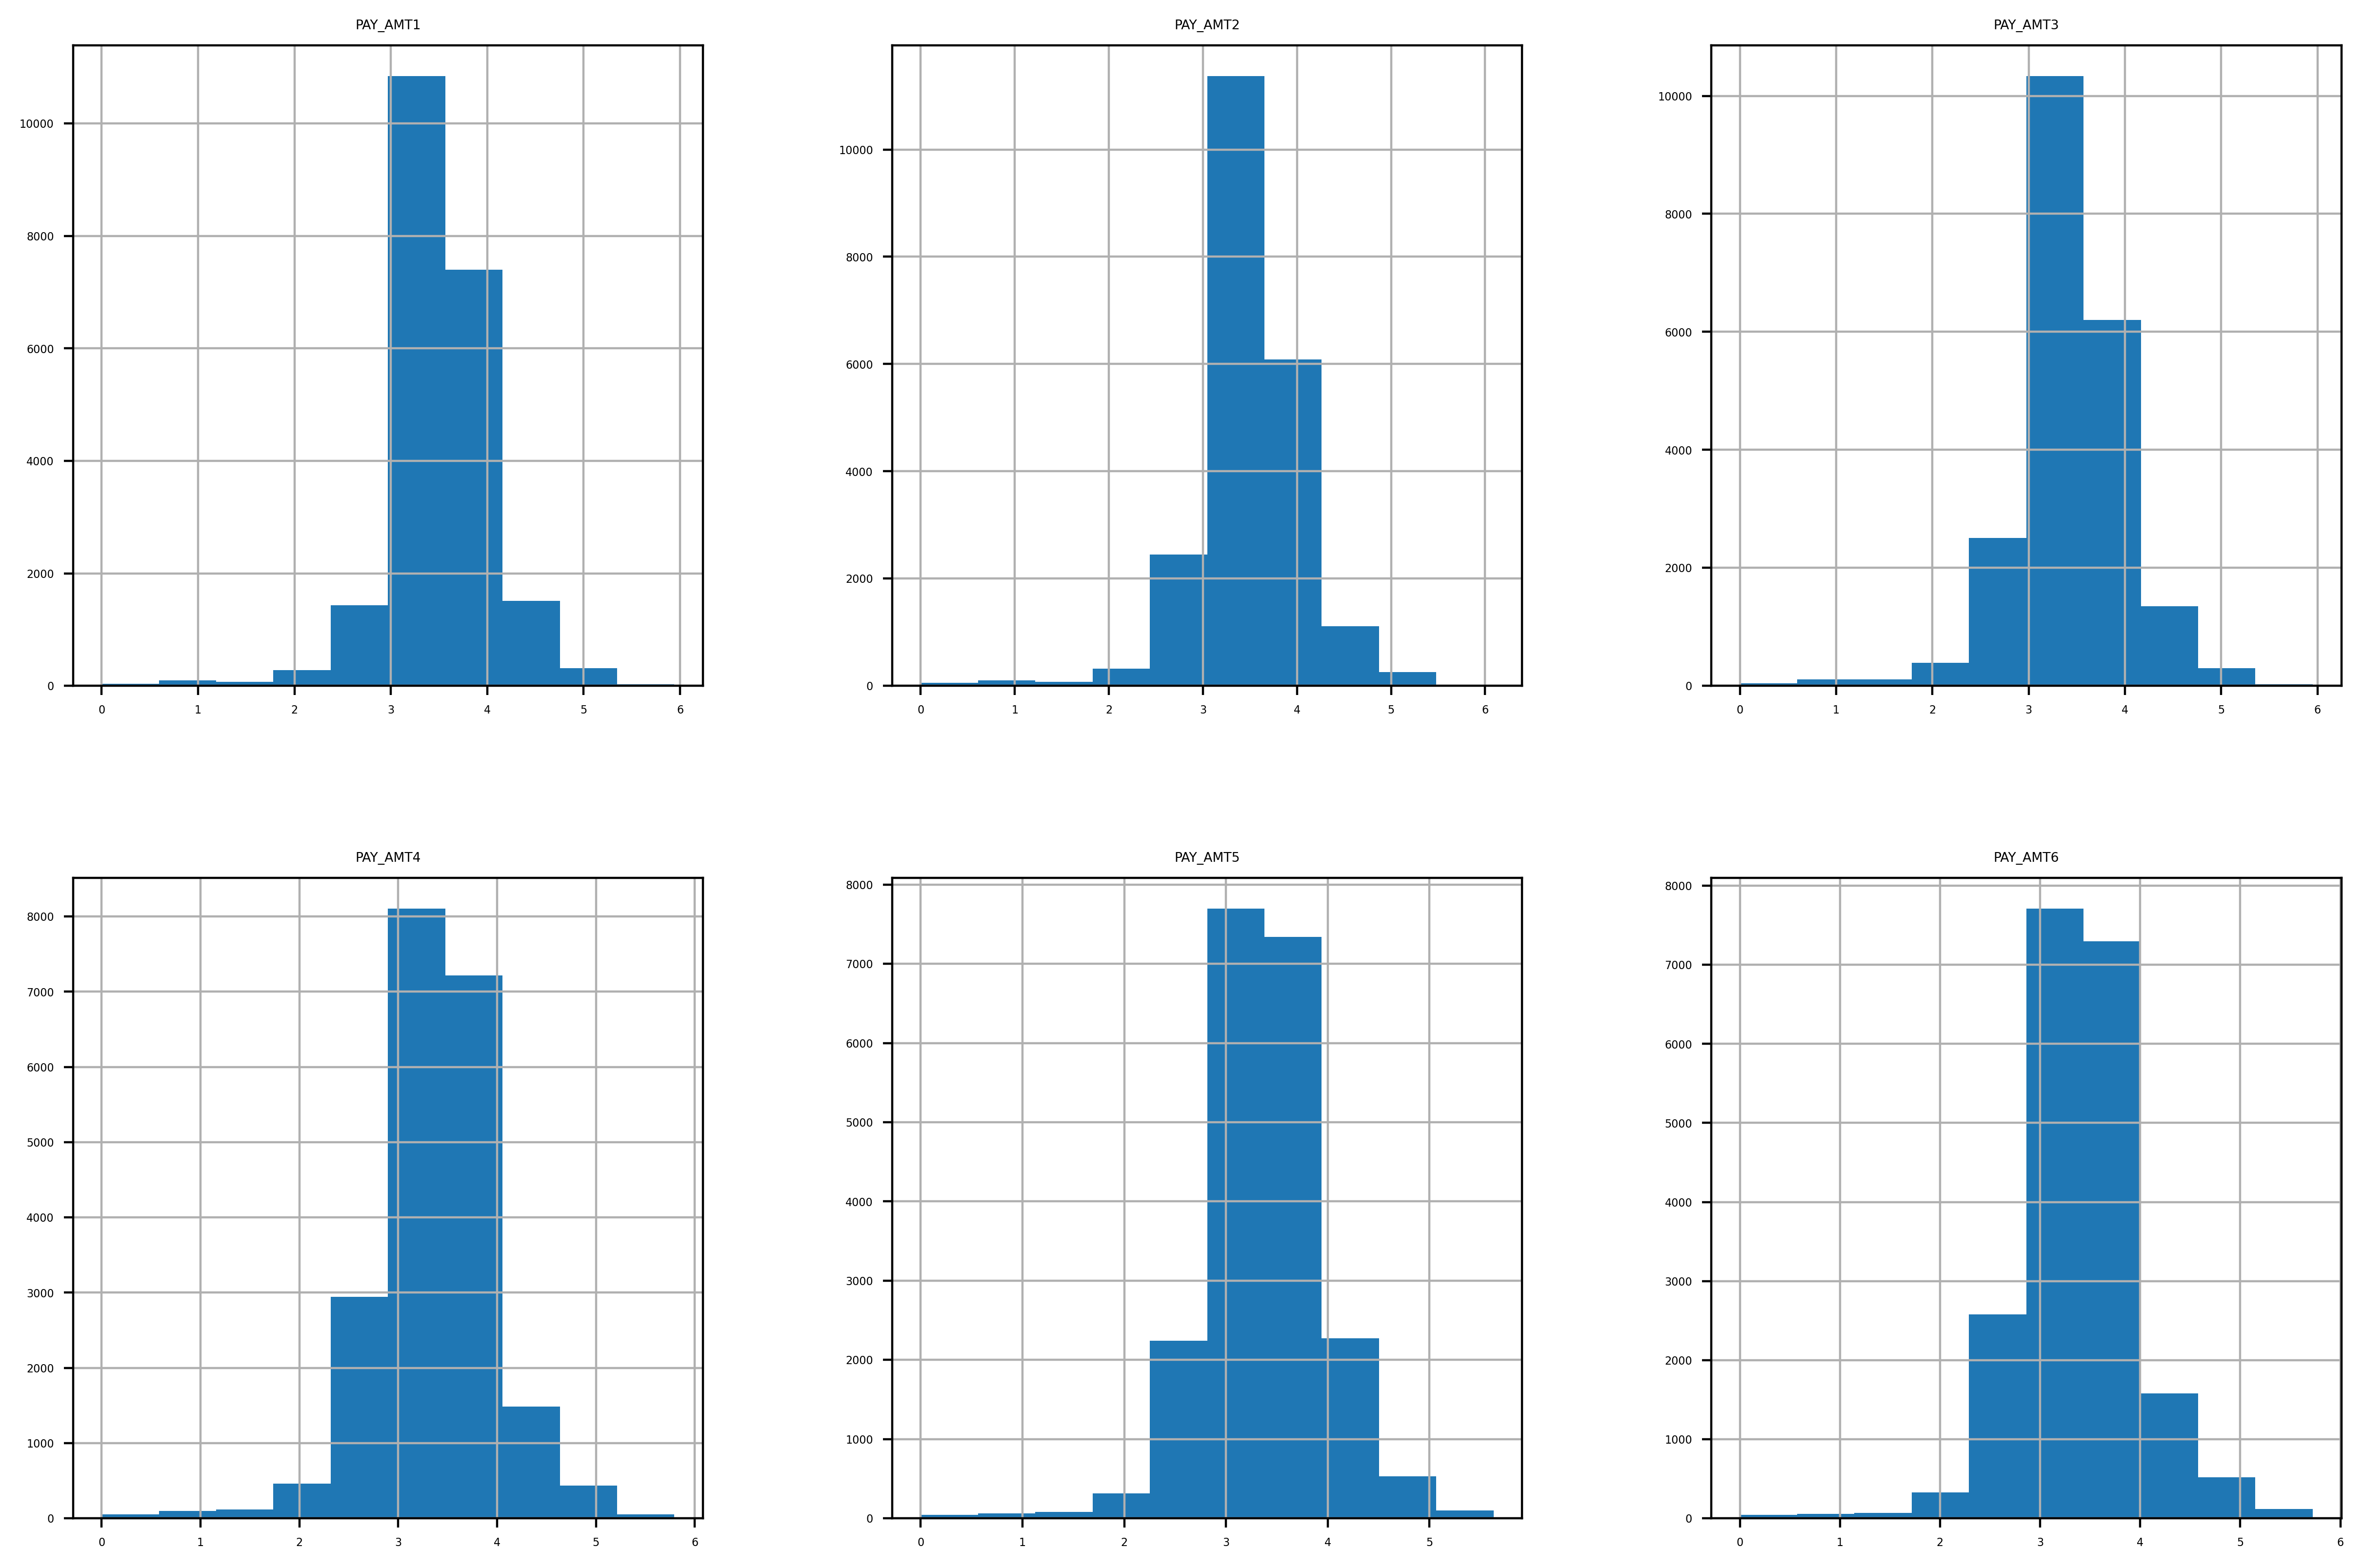

In [114]:
import numpy as np
pay_amt_feats[~pay_z_mask].apply(np.log10).hist(layout=(2,3),figsize=(15,10))
